In [1]:
import matplotlib.pyplot as plt
from elisa.query.data import ElisaQuery

# Initialize (uses Harvard VizieR mirror by default)
elisa = ElisaQuery()

Using VizieR server: https://vizier.cfa.harvard.edu


# Load a star cluster catalog

In [2]:
df_clusters, df_members = elisa.load_catalog('alfonso-2024', load_members=True)

Loading clusters and members from Alfonso et al. 2024
Loaded 370 clusters from the alfonso-2024 catalog.
Loaded 87708 members from the alfonso-2024 catalog.


In [3]:
df_members.head()

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,PlxCorr,_RA.icrs,_DE.icrs
0,ASCC_10,125596289824676864,50.703770,33.515756,-2.054702,-1.767013,1.324568,1.291788,50.703781,33.515764
1,ASCC_10,125638758461159040,50.348322,33.726894,-1.167929,-2.679550,1.311128,1.269733,50.348328,33.726905
2,ASCC_10,125646248884232448,50.763114,33.678626,-1.895948,-1.781295,1.347874,1.306567,50.763125,33.678634
3,ASCC_10,125646558121874176,50.753848,33.699988,-1.707604,-3.275335,1.340151,1.307543,50.753857,33.700003
4,ASCC_10,125673736674769792,50.713269,34.083176,-2.139180,-3.446868,1.348603,1.306908,50.713280,34.083191


# Query by source IDs

In [18]:
cluster = 'ASCC_16' # 'Collinder_69', 'Gulliver_6
source_ids = df_members[df_members['Cluster'] == cluster]['GaiaDR3'].values # Pleiades
len(source_ids)

508

In [19]:
df_gaia = elisa.gaia_source_id(source_id=source_ids)

INFO: Query finished. [astroquery.utils.tap.core]
Query returned 146 rows.


In [20]:
df_gaia.to_csv(f"/Users/steven/Documents/uniandesProject/data/Alfonso+24_{cluster.replace('_', '')}.csv", index=False)

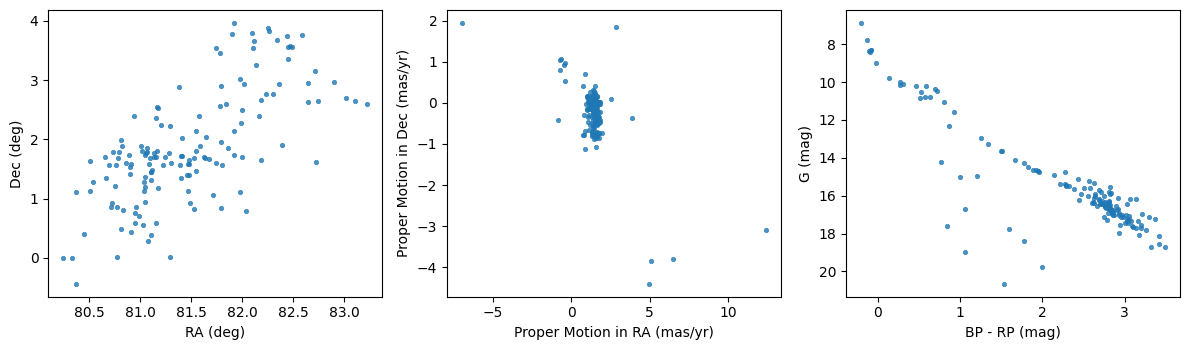

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(df_gaia['ra'], df_gaia['dec'], s=10, marker='o', lw=0.5, alpha=0.8, label='Cluster')
axes[0].set_xlabel('RA (deg)')
axes[0].set_ylabel('Dec (deg)')

axes[1].scatter(df_gaia['pmra'], df_gaia['pmdec'], s=10, marker='o', lw=0.5, alpha=0.8)
axes[1].set_xlabel('Proper Motion in RA (mas/yr)')
axes[1].set_ylabel('Proper Motion in Dec (mas/yr)')

axes[2].scatter(df_gaia['phot_bp_mean_mag'] - df_gaia['phot_rp_mean_mag'], df_gaia['phot_g_mean_mag'], s=10, marker='o', lw=0.5, alpha=0.8)
axes[2].invert_yaxis()
axes[2].set_xlabel('BP - RP (mag)')
axes[2].set_ylabel('G (mag)')

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout(rect=[0, 0, 1, 0.9])

In [7]:
for idx, value in enumerate(df_gaia.keys()):
    print(idx, value)

0 solution_id
1 designation
2 source_id
3 random_index
4 ref_epoch
5 ra
6 ra_error
7 dec
8 dec_error
9 parallax
10 parallax_error
11 parallax_over_error
12 pm
13 pmra
14 pmra_error
15 pmdec
16 pmdec_error
17 ra_dec_corr
18 ra_parallax_corr
19 ra_pmra_corr
20 ra_pmdec_corr
21 dec_parallax_corr
22 dec_pmra_corr
23 dec_pmdec_corr
24 parallax_pmra_corr
25 parallax_pmdec_corr
26 pmra_pmdec_corr
27 astrometric_n_obs_al
28 astrometric_n_obs_ac
29 astrometric_n_good_obs_al
30 astrometric_n_bad_obs_al
31 astrometric_gof_al
32 astrometric_chi2_al
33 astrometric_excess_noise
34 astrometric_excess_noise_sig
35 astrometric_params_solved
36 astrometric_primary_flag
37 nu_eff_used_in_astrometry
38 pseudocolour
39 pseudocolour_error
40 ra_pseudocolour_corr
41 dec_pseudocolour_corr
42 parallax_pseudocolour_corr
43 pmra_pseudocolour_corr
44 pmdec_pseudocolour_corr
45 astrometric_matched_transits
46 visibility_periods_used
47 astrometric_sigma5d_max
48 matched_transits
49 new_matched_transits
50 matched_

# Query Gaia DR3 by coordinates

In [8]:
coordinates = {'ra': 56.6, 'dec': 24.1, 'radius': 1.5} # Pleiades
df = elisa.gaia_query(coordinates=coordinates, use_default_filters=True)

INFO: Query finished. [astroquery.utils.tap.core]
Query returned 8467 rows.


In [9]:
df.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,Gaia DR3 64129805964069888,64129805964069888,613342098,2016.0,57.056282,0.189555,22.722982,0.135388,2.379016,...,0.7646,0.7010,0.8258,0.4914,0.4503,0.5313,0.3140,0.2888,0.3393,MARCS
1,1636148068921376768,Gaia DR3 64129947701319040,64129947701319040,1730768174,2016.0,57.013782,0.036525,22.718169,0.026314,0.588870,...,0.1960,0.1701,0.2181,0.1642,0.1422,0.1828,0.0894,0.0774,0.0996,MARCS
2,1636148068921376768,Gaia DR3 64129982061054336,64129982061054336,1640378519,2016.0,57.048666,0.016583,22.721705,0.012500,1.576054,...,0.3879,0.3737,0.3995,0.3249,0.3128,0.3348,0.1757,0.1691,0.1811,MARCS
3,1636148068921376768,Gaia DR3 64131764469167616,64131764469167616,1221463988,2016.0,57.129139,0.087928,22.760709,0.061300,1.533348,...,0.8849,0.8522,0.9128,0.6300,0.6063,0.6503,0.3430,0.3306,0.3536,MARCS
4,1636148068921376768,Gaia DR3 64133624193293952,64133624193293952,110178283,2016.0,57.271670,0.020879,22.748418,0.012184,0.920643,...,0.3695,0.3463,0.3885,0.3050,0.2856,0.3210,0.1648,0.1543,0.1735,MARCS


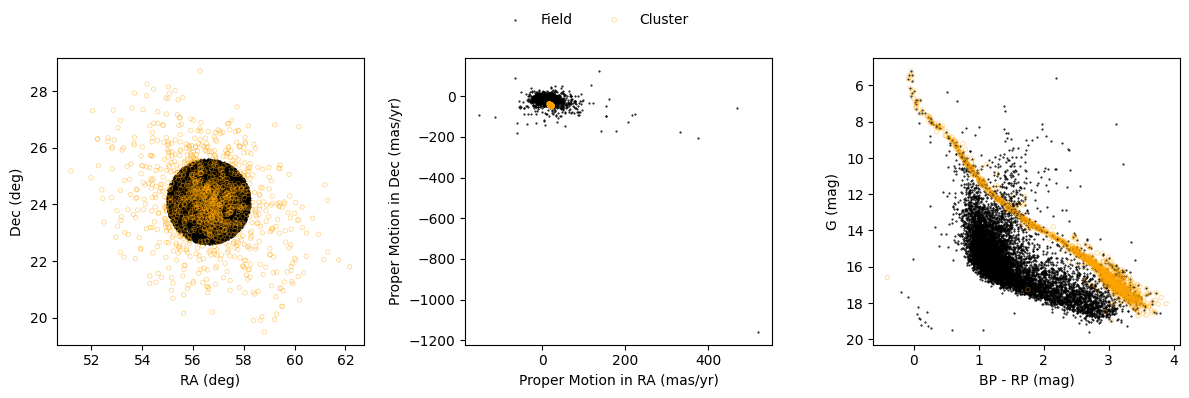

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(df['ra'], df['dec'], s=1, c='k', label='Field', marker='.')
axes[0].scatter(df_gaia['ra'], df_gaia['dec'], s=10, marker='o', facecolors='none', edgecolors='orange', lw=0.5, alpha=0.5, label='Cluster')
axes[0].set_xlabel('RA (deg)')
axes[0].set_ylabel('Dec (deg)')

axes[1].scatter(df['pmra'], df['pmdec'], s=1, c='k', marker='.')
axes[1].scatter(df_gaia['pmra'], df_gaia['pmdec'], s=10, marker='o', facecolors='none', edgecolors='orange', lw=0.5, alpha=0.5)
axes[1].set_xlabel('Proper Motion in RA (mas/yr)')
axes[1].set_ylabel('Proper Motion in Dec (mas/yr)')

axes[2].scatter(df['phot_bp_mean_mag'] - df['phot_rp_mean_mag'], df['phot_g_mean_mag'], s=1, c='k', marker='.')
axes[2].scatter(df_gaia['phot_bp_mean_mag'] - df_gaia['phot_rp_mean_mag'], df_gaia['phot_g_mean_mag'], s=10,
                marker='o', facecolors='none', edgecolors='orange', lw=0.5, alpha=0.5)
axes[2].invert_yaxis()
axes[2].set_xlabel('BP - RP (mag)')
axes[2].set_ylabel('G (mag)')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.9])